In [1]:
pip install psycopg2

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -------------------------------------- - 2.6/2.7 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2 as pg2

In [4]:
conn = pg2.connect(database='sales_data', user='postgres',password='DragonBallZ@PGSQL')

In [5]:
cur = conn.cursor()

In [6]:
cur.execute("SELECT * FROM sales")

In [7]:
cur.fetchmany(10)

[(10001,
  'Joseph',
  'Gloves',
  10101,
  3000,
  2,
  6000,
  datetime.datetime(2025, 10, 25, 20, 15, 49, 478915),
  'Texas'),
 (10003,
  'Roger',
  'Shoes',
  10102,
  15000,
  1,
  15000,
  datetime.datetime(2025, 10, 26, 15, 34, 7, 418657),
  'NYC'),
 (10005,
  'Smith',
  'Gloves',
  10101,
  3000,
  1,
  3000,
  datetime.datetime(2025, 10, 26, 15, 37, 2, 687899),
  'NYC'),
 (10006,
  'Samuel',
  'Jacket',
  10103,
  32500,
  1,
  32500,
  datetime.datetime(2025, 10, 26, 15, 41, 7, 87658),
  'NYC'),
 (10007,
  'Galvin',
  'Trousers',
  10105,
  10000,
  2,
  20000,
  datetime.datetime(2025, 10, 26, 15, 42, 58, 268771),
  'Dallas'),
 (10008,
  'Gimmy',
  'Backpack',
  10104,
  5000,
  1,
  5000,
  datetime.datetime(2025, 10, 26, 15, 45, 33, 927629),
  'Texas'),
 (10009,
  'Tej',
  'Shoes',
  10102,
  15000,
  1,
  15000,
  datetime.datetime(2025, 10, 26, 15, 47, 18, 742569),
  'San Francisco'),
 (10010,
  'Travis',
  'Shoes',
  10102,
  15000,
  1,
  15000,
  datetime.datetime(202

In [8]:
sql_query = "SELECT SUM(order_quantity) FROM sales;"

In [9]:
cur.execute(sql_query)

In [10]:
total_quantity_sold = cur.fetchone()[0]
print(f"Total Quantity Sold: {total_quantity_sold}")

Total Quantity Sold: 13


In [11]:
sql_query = "SELECT SUM(sales) FROM sales;"
cur.execute(sql_query)

In [12]:
total_revenue_generated = cur.fetchone()[0]
print(f"Total revenue generated: {total_revenue_generated}")

Total revenue generated: 186500


In [35]:
cur.execute("SELECT product_name, SUM(order_quantity) AS total_quantity_sold FROM sales GROUP BY product_name ORDER BY product_name;")

In [36]:
cur.fetchmany(5)

[('Backpack', 1), ('Gloves', 3), ('Jacket', 3), ('Shoes', 3), ('Trousers', 3)]

In [13]:
conn.rollback()
import matplotlib.pyplot as plt
#cur.execute("SELECT product_name, order_quantity FROM sales ORDER BY order_quantity DESC;")
cur.execute("SELECT product_name, SUM(order_quantity) AS total_quantity_sold FROM sales GROUP BY product_name ORDER BY product_name;")


In [14]:
rows = cur.fetchall()

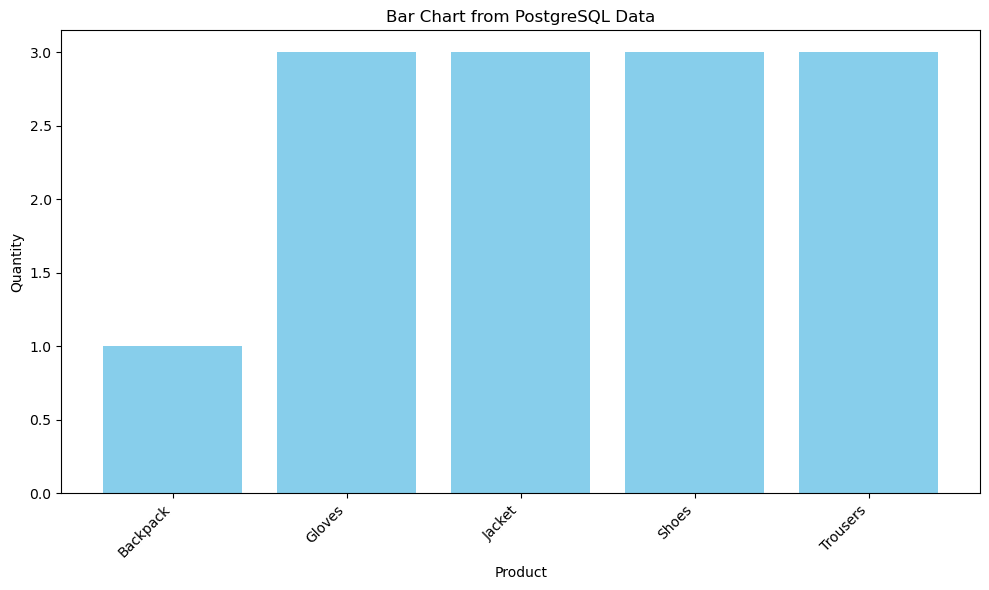

In [15]:
product_name = [row[0] for row in rows]
order_quantity = [row[1] for row in rows]

    # 3. Plot Bar Chart
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size
plt.bar(product_name, order_quantity, color='skyblue')
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.title("Bar Chart from PostgreSQL Data")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()